# BMW Used Car Data  Analysis


- The dataset consists of the used sale prices of certain BMW car. It has roughly 5000 rows and 18 columns.
  - maker_key ( all the cars are of make BMW)
  - model_key (Model_key of Bmw car ,75 unique model keys)
  - mileage
  - engine_power	
  - registration_date (when first owner bought it)
  - fuel (what type of fuel used in car,four different fuel type are there in this dataset,Namely - Diesel, Petrol, Hybrid Petrol and Electro )
  - paint_color(there are 10 different color cars in the dataset)
  - car_type(there are 8 different car_types in the dataset,Namely - Convertible, Coupe, Estate, Hatchback, Sedan, Subcompact, SUV and Van
  - some boolean features are there
  - price
  - sold_at-(date when was second owner sold)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import median
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')

In [8]:
bmw=pd.read_csv("bmw_pricing_challenge.csv")
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,01-02-2012,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,01-01-2018
1,BMW,M4,13929,317,01-04-2016,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,01-02-2018
2,BMW,320,183297,120,01-04-2012,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,01-02-2018
3,BMW,420,128035,135,01-07-2014,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,01-02-2018
4,BMW,425,97097,160,01-12-2014,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,01-04-2018


In [9]:
bmw.shape

(4843, 18)

In [10]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [11]:
bmw.describe()

,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


Milege in negative number so drop negative mileage records

# Feature Engineering

In [12]:
bmw[bmw['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,01-03-2017,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,01-04-2018


In [13]:
bmw=bmw.drop(bmw[bmw['mileage']<0].index)

Drop records where engine power is 0

In [14]:
bmw[bmw['engine_power']==0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
3765,BMW,X1,81770,0,01-10-2014,diesel,white,suv,False,False,False,False,False,False,False,False,11700,01-03-2018


In [15]:
bmw=bmw.drop(bmw[bmw['engine_power']==0].index)

In [16]:
bmw.describe()

,mileage,engine_power,price
count,4.841000e+03,4841.000000,4841.000000
mean,1.410042e+05,128.994010,15816.711423
std,6.016901e+04,38.930253,9182.686706
min,4.760000e+02,25.000000,100.000000
25%,1.030340e+05,100.000000,10800.000000
50%,1.410890e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [17]:
bmw.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [18]:
bmw.duplicated().sum()

0

In [19]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [20]:
bmw['maker_key'].unique()

array(['BMW'], dtype=object)

### Boolean Features

In [21]:
bool_col=bmw.select_dtypes(include=['boolean']).columns
for col in bool_col:
    print(col," ",bmw[col].unique())

feature_1   [ True False]
feature_2   [ True False]
feature_3   [False  True]
feature_4   [False  True]
feature_5   [ True False]
feature_6   [ True False]
feature_7   [ True False]
feature_8   [False  True]


In [22]:
for col in bool_col:
    bmw[col]=bmw[col].apply(lambda x: 1 if x==True else 0)

In [23]:
bmw[bool_col]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,1,1,0,0,1,1,1,0
1,1,1,0,0,0,1,1,1
2,0,0,0,0,1,0,1,0
3,1,1,0,0,1,1,1,1
4,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...
4838,0,1,0,0,0,0,1,0
4839,0,1,0,0,0,0,1,1
4840,0,1,0,0,0,0,1,1
4841,1,1,0,0,0,0,1,1


Encoded boolean features with 1 and 0

#### Categorical features

In [24]:
cat_col=bmw.select_dtypes(include=('object')).columns
cat_col

Index(['maker_key', 'model_key', 'registration_date', 'fuel', 'paint_color',
       'car_type', 'sold_at'],
      dtype='object')

In [25]:
cat_col=['fuel','model_key','paint_color','car_type']

In [26]:
bmw[cat_col].head()

,fuel,model_key,paint_color,car_type
0,diesel,118,black,convertible
1,petrol,M4,grey,convertible
2,diesel,320,white,convertible
3,diesel,420,red,convertible
4,diesel,425,silver,convertible


In [27]:
for col in cat_col:
    print(col,"\n ",bmw[col].unique(),"------->",bmw[col].nunique(),"\n\n")
    

fuel 
  ['diesel' 'petrol' 'hybrid_petrol' 'electro'] -------> 4 


model_key 
  ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] -------> 75 


paint_color 
  ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] -------> 10 


car_type 
  ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcomp

- Observation:
    - There are Four fuel type cars in the datset
    'diesel', 'petrol' ,'hybrid_petrol', 'electro'
    - 75 unique model keys are there
    -10 different paint_color cars are there in the dataset
    'black' ,'grey','white' ,'red' ,'silver' ,'blue', 'orange' ,'beige' ,'brown', 'green'
    - 8 different car types are there
      'convertible' ,'coupe' ,'estate' ,'hatchback' 'sedan', 'subcompact' ,'suv' ,'van'
 

###### Encoding "fuel" types 

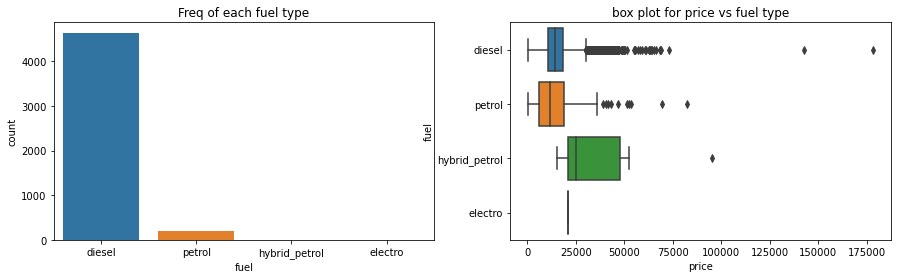

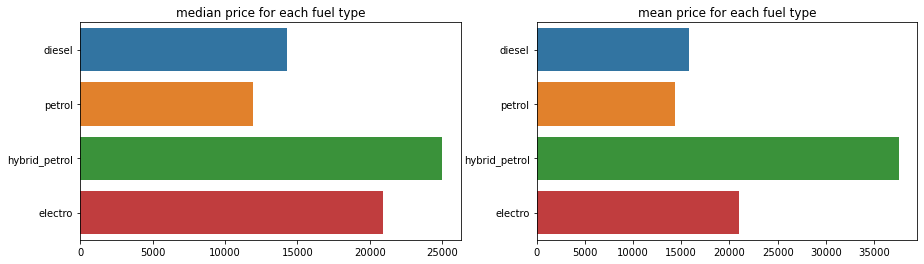

In [28]:
# plot frequency of each of the fuel  types
fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=bmw['fuel'],ax=ax[0])
ax[0].set_title('Freq of each fuel type')
sns.boxplot(x='price',y='fuel',data=bmw,ax=ax[1])
ax[1].set_title('box plot for price vs fuel type')

#plot for normalised metrices on price for each fuel type
# median
fuel_median=[]
fuel_mean=[]
for each in bmw.fuel.unique():
    x= bmw[bmw.fuel==each]
    fuel_median.append(x['price'].median())
    fuel_mean.append(x['price'].mean())
    
fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.barplot(y=bmw.fuel.unique(),x=fuel_median,ax=ax[0])
ax[0].set_title("median price for each fuel type")

sns.barplot(y=bmw.fuel.unique(),x=fuel_mean,ax=ax[1])
ax[1].set_title("mean price for each fuel type")
plt.show()

- Observations:
    - Mean price of hybrid-petrol  and electro cars are highest amongst all types,but dataset has very hybrid_petrol,electro            cars.we need to drop hybrid_petrol,electro for better prediction

In [29]:
bmw=bmw.drop(bmw[(bmw['fuel']=='hybrid_petrol') | (bmw['fuel']=='electro')].index)

In [30]:
bmw['fuel_E'] = bmw.fuel.map({'diesel':2,'petrol':1})

In [31]:
bmw.shape

(4830, 19)

### Encoding "Paint colour"

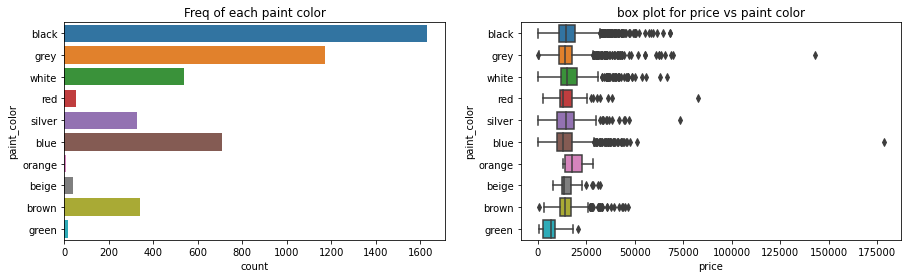

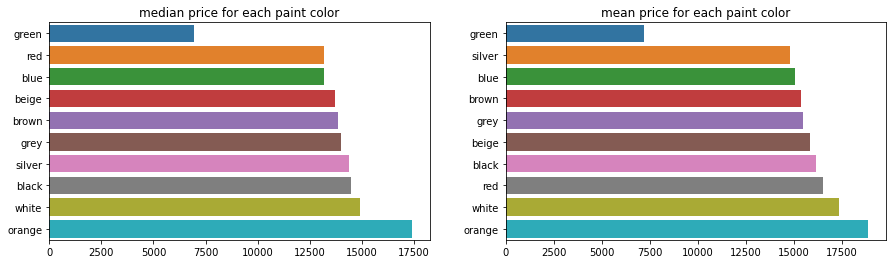

In [32]:
#plot the frequency of the each paint colour

fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.countplot(y=bmw.paint_color,ax=ax[0])
ax[0].set_title('Freq of each paint color')
sns.boxplot(x=bmw['price'],y=bmw['paint_color'],ax=ax[1]) 
ax[1].set_title('box plot for price vs paint color')

#plot for normalised metrices on price for each paint color

paint_median=[]
paint_mean=[]
for each in bmw.paint_color.unique():
    p_df=bmw[bmw['paint_color']==each]
    paint_median.append(p_df.price.median())
    paint_mean.append(p_df.price.mean())

fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.barplot(x=sorted(paint_median),y=bmw.paint_color.unique()[np.argsort(paint_median)],ax=ax[0])
ax[0].set_title("median price for each paint color")
sns.barplot(x=sorted(paint_mean),y=bmw.paint_color.unique()[np.argsort(paint_mean)],ax=ax[1])
ax[1].set_title("mean price for each paint color")
plt.show()

In [33]:
avg_price_by_color= [np.mean(bmw[bmw.paint_color==each]['price'])  for each in bmw.paint_color.unique() ]
paint_dummy_df=pd.DataFrame(bmw.paint_color.unique(),columns=['paint_color'])
paint_dummy_df['total_avg_price']=bmw.price.mean()
paint_dummy_df['avg_price_by_color']=avg_price_by_color
paint_dummy_df['diff_avg_price']=(paint_dummy_df['total_avg_price']-paint_dummy_df['avg_price_by_color'])/paint_dummy_df['total_avg_price']*100
paint_dummy_df.sort_values('diff_avg_price')

,paint_color,total_avg_price,avg_price_by_color,diff_avg_price
6,orange,15777.47412,18866.666667,-19.579766
2,white,15777.47412,17331.716418,-9.851021
3,red,15777.47412,16500.000000,-4.579478
0,black,15777.47412,16124.754300,-2.201114
7,beige,15777.47412,15817.073171,-0.250985
1,grey,15777.47412,15487.532024,1.837697
8,brown,15777.47412,15350.882353,2.703803
5,blue,15777.47412,15070.944993,4.478088
4,silver,15777.47412,14816.109422,6.093274
9,green,15777.47412,7200.000000,54.365319


- Quick observations:
    - Orange cars have almost same median and average price and highest amost all.
    - Green cars have least median and average price.
    - Other colors of the cars median and average prices are changing in order.
    - All the cars paint colors except orange, white, silver and green, average price is within 5% of the total price.
 - following the observations below weightage can be used for label encoding
        - orange -> 5
        - white -> 4
        - remaing -> 3
        - silver -> 2
        - green -> 1


In [34]:
bmw['paint_color_E']=bmw.paint_color.apply(lambda x: 5 if x=='orange' else
                                          (4 if x=='white' else(
                                          2 if x=='silver' else(
                                          1 if x=='green' else 3))))

In [35]:
bmw.model_key.unique()

array(['118', 'M4', '320', '420', '425', '335', '325', 'Z4', '120', '220',
       '650', '135', '218', '318', '430', 'M3', '330', '225', 'M235',
       '316', '435', '640', '640 Gran Coupé', '435 Gran Coupé', '630',
       '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '518', '116', '328', '523', 'X3', 'M550',
       '528', '325 Gran Turismo', '125', '318 Gran Turismo',
       '420 Gran Coupé', '114', '520 Gran Turismo', '530 Gran Turismo',
       'M135', '418 Gran Coupé', '330 Gran Turismo', '335 Gran Turismo',
       '730', '123', '535 Gran Turismo', '740', '750', '735', 'M5', 'X5',
       'X1', 'X4', 'X6', 'X6 M', 'X5 M', 'X5 M50', '218 Active Tourer',
       '218 Gran Tourer', '216', '220 Active Tourer', '216 Gran Tourer',
       '216 Active Tourer', '225 Active Tourer', '214 Gran Tourer'],
      dtype=object)

In [36]:
bmw.model_key.nunique()

72

Text(0, 0.5, 'Model keys')

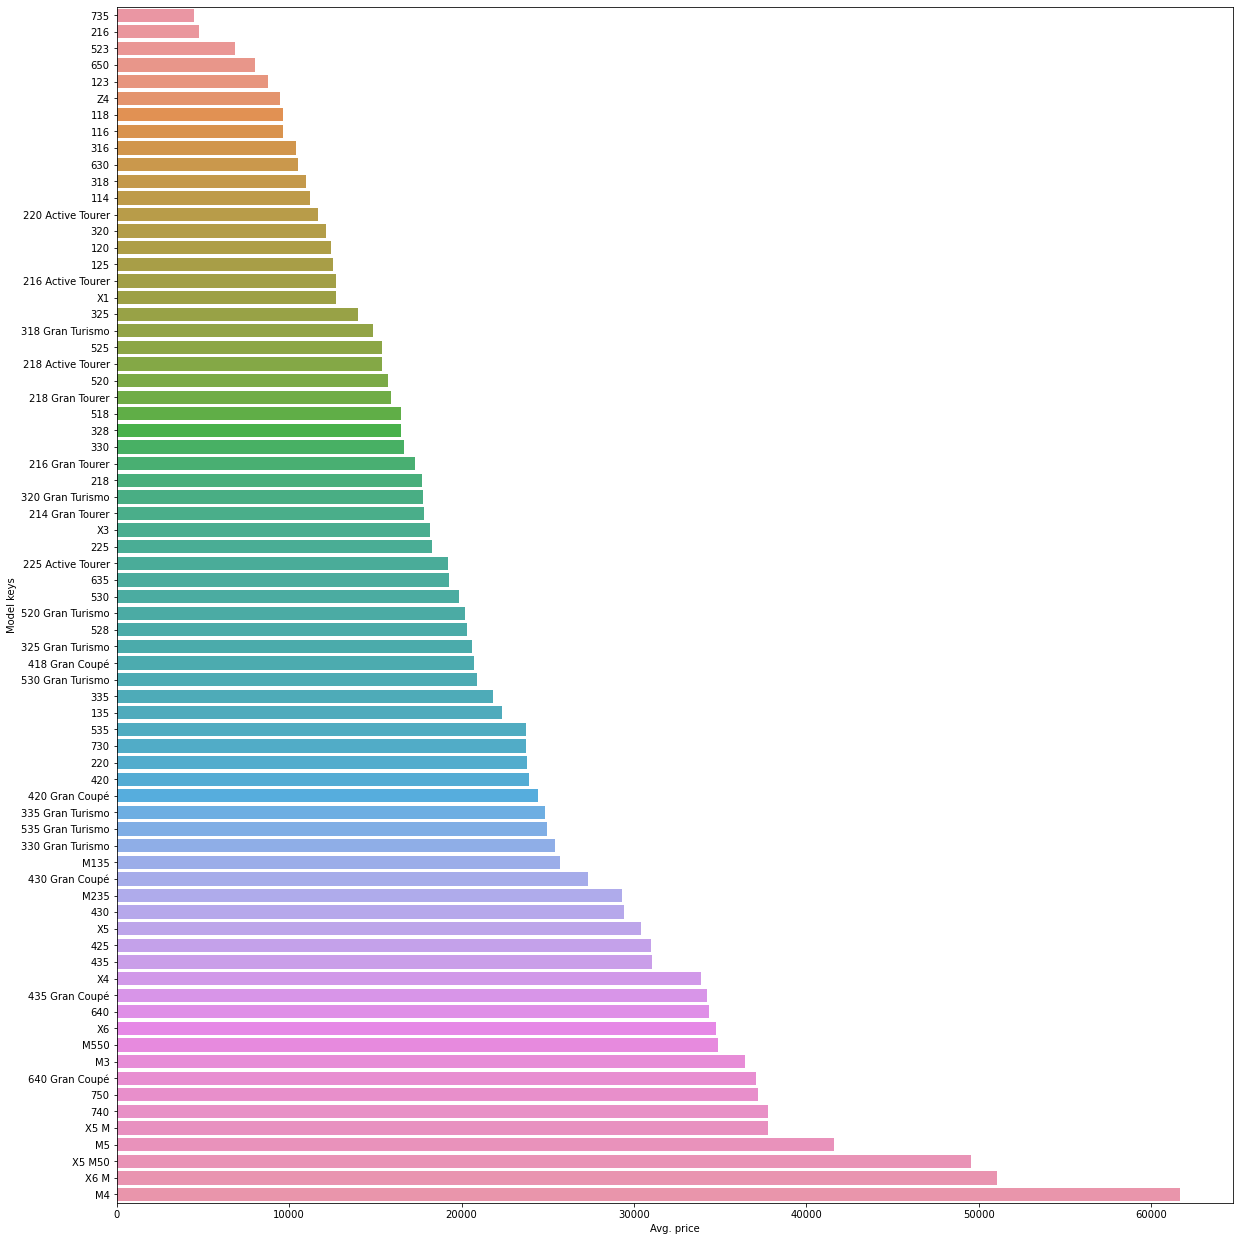

In [37]:
model_key_lst=[]
for key in bmw.model_key.unique():
    df=bmw[bmw.model_key==key]
    model_key_lst.append(df['price'].mean())
plt.figure(figsize=(20,22))
#x = pd.concat([pd.DataFrame(bmw.model_key.unique(), columns=['Key']), pd.DataFrame(model_key_lst,columns=['value'])], axis = 1).sort_values('value')
sns.barplot(y=bmw.model_key.unique()[np.argsort(model_key_lst)],x=sorted(model_key_lst)) 
plt.xlabel('Avg. price')
plt.ylabel('Model keys')

In [38]:
bmw['model_key_E'] =bmw.model_key.apply(lambda x: 6 if x == 'i8' else(
5 if x== 'M4' else(
4 if x=='X6 M' else(
1 if x == 'X5 M50' else(
1 if x in('735', '216', '523', '650', '123', 'Z4', '118', '116', '316',
       '630', '318', '114', '220 Active Tourer', '320', '120', '125',
       '216 Active Tourer', 'X1') else(
2 if x in ('325', '318 Gran Turismo', '525',
       '218 Active Tourer', '520', '218 Gran Tourer', '518', '328', '330',
       '216 Gran Tourer', '218', '320 Gran Turismo', '214 Gran Tourer',
       'X3', '225', '225 Active Tourer', '635', '530', '520 Gran Turismo',
       '528', '325 Gran Turismo', '418 Gran Coupé', '530 Gran Turismo',
       'ActiveHybrid 5', 'i3', '335', '135') else(
3)))))))

In [39]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at', 'fuel_E', 'paint_color_E',
       'model_key_E'],
      dtype='object')

In [40]:
car_type=[]
for each in bmw.car_type.unique():
    df=bmw[bmw.car_type==each]
    car_type.append(np.mean(df['price']))
df=pd.concat([pd.DataFrame(bmw.car_type.unique(),columns=['car_type']),pd.DataFrame(car_type,columns=['mean'])],axis=1).sort_values('mean',ascending=False)
df

,car_type,mean
1,coupe,21463.106796
6,suv,21452.277040
0,convertible,17136.170213
4,sedan,15962.521441
7,van,14350.000000
3,hatchback,13242.939481
2,estate,13112.141968
5,subcompact,9362.068966


Text(0, 0.5, 'mean')

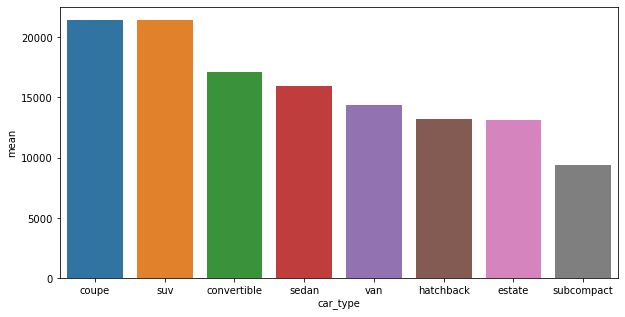

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x='car_type',y='mean',data=df)
plt.xlabel('car_type')
plt.ylabel('mean')

In [42]:
bmw['car_type_E']=bmw.car_type.apply(lambda x:1 if x=='subcompact' else(
2 if x=='estate' else(
3 if x=='hatchback' else(
4 if x=='van' else(
5 if x=='sedan' else(
6 if x=='sedan' else(
7 if x=='sedan' else 8)))))))

In [43]:
### relation between model_key and mileage
mileage_mean=[]
for each in bmw.model_key.unique():
    df= bmw[bmw.model_key==each]
    mileage_mean.append(df.mileage.mean())
df=pd.concat([pd.DataFrame(bmw.model_key.unique(),columns=['model_key']),pd.DataFrame(mileage_mean,columns=['mean'])],axis=1).sort_values('mean',ascending=False)
df

,model_key,mean
35,523,207175.250000
45,530 Gran Turismo,188735.722222
55,735,184189.000000
26,635,173302.000000
28,525,170967.271739
...,...,...
70,225 Active Tourer,33300.000000
9,220,31972.000000
66,216,31079.000000
71,214 Gran Tourer,28573.000000


Text(0, 0.5, 'model_key')

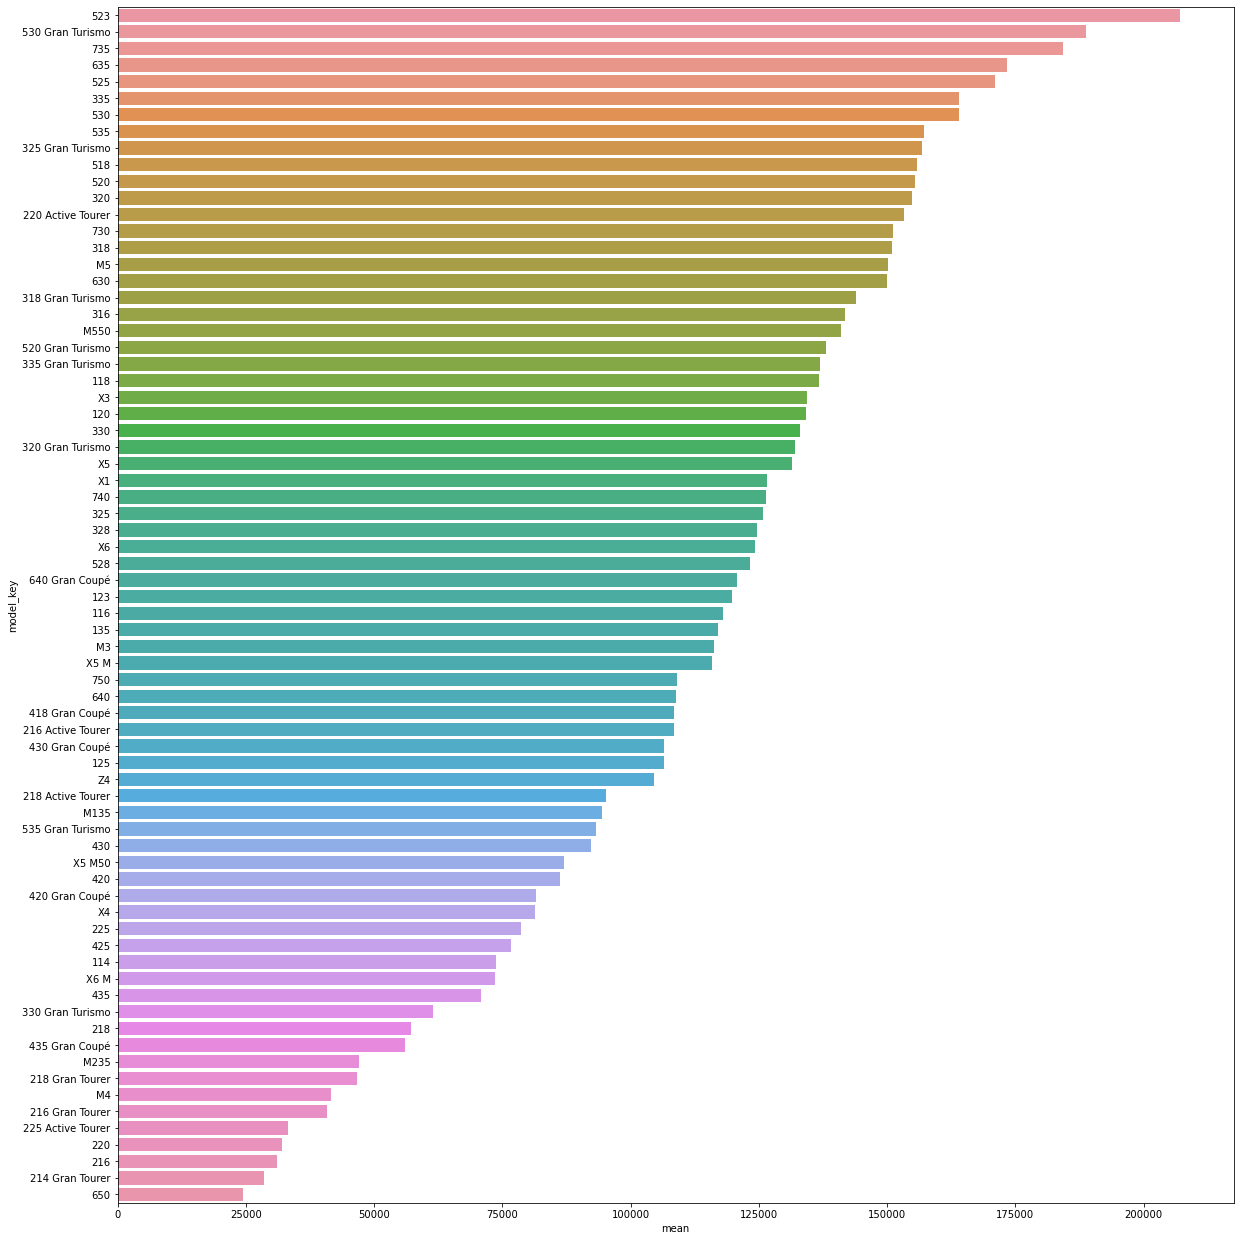

In [44]:
plt.figure(figsize=(20,22))
sns.barplot(x='mean',y='model_key',data=df)
plt.xlabel('mean')
plt.ylabel('model_key')

In [45]:
bmw['model_key_mileage_rel'] = bmw.model_key.apply(lambda x : 5 if x == '523' else (
4 if x in ('530 Gran Turismo', '735', '635', '525', '335', '530') else (
3 if x in ('535', '325 Gran Turismo', '518', '520', '320',
       '220 Active Tourer', '730', '318', 'M5', '630', '318 Gran Turismo',
       '316', 'M550', '520 Gran Turismo', '335 Gran Turismo', '118', 'X3',
       '120', '330', '320 Gran Turismo', 'X5') else (
2 if x in ('X1', '740', '325', '328',
       'X6', '528', '640 Gran Coupé', '123', '116', '135', 'M3', 'X5 M',
       '750', '640', '418 Gran Coupé', '216 Active Tourer',
       '430 Gran Coupé', '125', 'Z4') else (
1)))))

In [46]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at', 'fuel_E', 'paint_color_E',
       'model_key_E', 'car_type_E', 'model_key_mileage_rel'],
      dtype='object')

In [47]:
bmw.corr()

,mileage,engine_power,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel
mileage,1.000000,-0.049803,0.067239,0.010689,0.003253,-0.052397,0.045190,-0.031076,0.153963,-0.039049,-0.407236,0.037536,-0.079606,-0.076101,-0.137097,0.306312
engine_power,-0.049803,1.000000,0.325628,0.202418,0.316258,0.447666,0.340891,0.232960,0.007044,0.490624,0.645156,-0.121142,0.005679,0.702638,0.288118,0.135894
feature_1,0.067239,0.325628,1.000000,0.306190,0.255193,0.229739,0.278607,0.134540,0.244483,0.225375,0.269007,0.010487,-0.067894,0.386498,0.139333,0.125743
feature_2,0.010689,0.202418,0.306190,1.000000,0.150857,0.149692,0.285780,0.136306,0.370222,0.223595,0.249515,0.097926,-0.018423,0.241293,-0.012416,0.140018
feature_3,0.003253,0.316258,0.255193,0.150857,1.000000,0.200288,0.199066,0.144131,0.061842,0.202963,0.257443,-0.014189,0.002300,0.278881,0.099473,0.059125
feature_4,-0.052397,0.447666,0.229739,0.149692,0.200288,1.000000,0.249705,0.154052,0.125865,0.276991,0.418372,0.074364,-0.038928,0.429634,0.400251,0.046160
feature_5,0.045190,0.340891,0.278607,0.285780,0.199066,0.249705,1.000000,0.256527,0.202967,0.333391,0.269097,-0.006254,0.040766,0.331558,0.069769,0.119358
feature_6,-0.031076,0.232960,0.134540,0.136306,0.144131,0.154052,0.256527,1.000000,0.129094,0.121357,0.217233,-0.029306,0.056297,0.153602,0.050859,-0.009134
feature_7,0.153963,0.007044,0.244483,0.370222,0.061842,0.125865,0.202967,0.129094,1.000000,-0.065092,-0.000115,0.046806,-0.069738,0.043669,-0.094515,0.067412
feature_8,-0.039049,0.490624,0.225375,0.223595,0.202963,0.276991,0.333391,0.121357,-0.065092,1.000000,0.445395,0.006761,0.024442,0.439476,0.164262,0.159772


<AxesSubplot:>

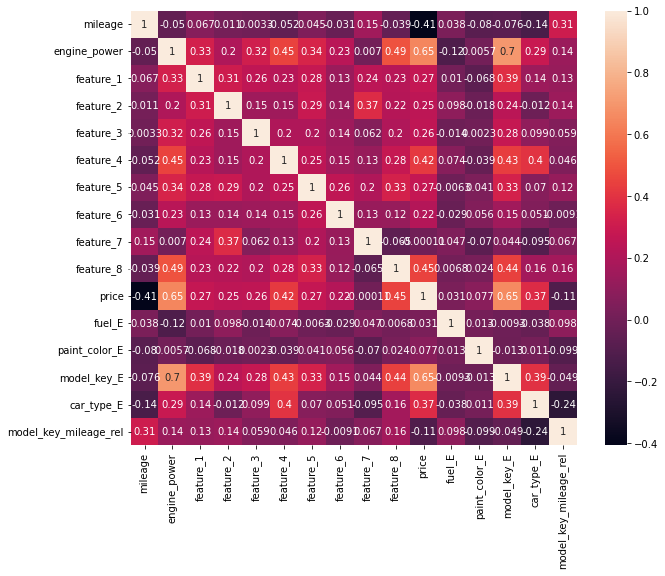

In [48]:
plt.figure(figsize=(10,8))
sns.heatmap(bmw.corr(),annot=True)

- Observation:
    - But  Mileage and Price has some  negatively correlation (-0.41)
    - Engine Power and Price has positive correlation (0.64)
    - Model-key is highly correlated with price(0.7)
    - engine-power and model key are highly correlated.but considering both of them best features  keeping both of them

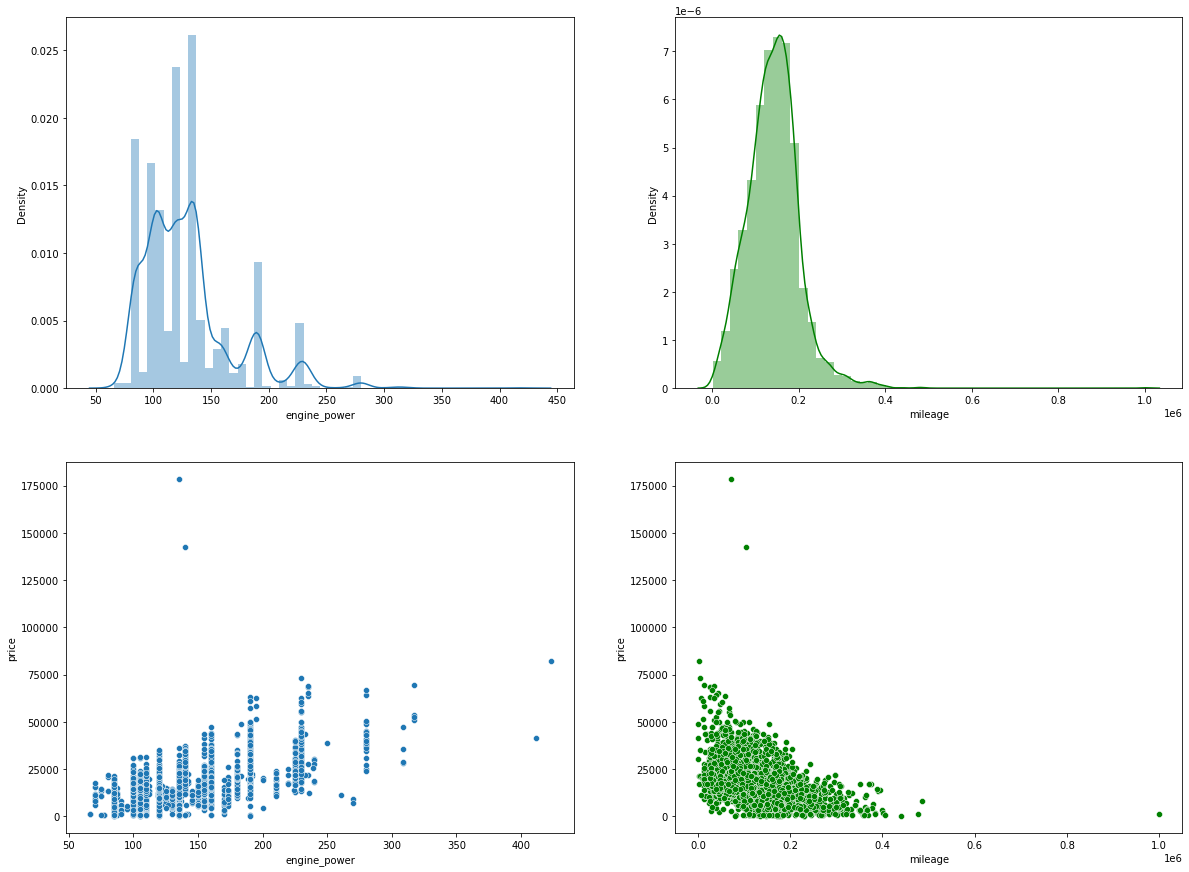

In [49]:
fig,ax=plt.subplots(2,2,figsize=(20,15))
sns.distplot(bmw['engine_power'],ax=ax[0,0])
sns.distplot(bmw['mileage'],ax=ax[0,1],color='g')
sns.scatterplot(bmw['engine_power'],bmw['price'],ax=ax[1,0])
sns.scatterplot(bmw['mileage'],bmw['price'],ax=ax[1,1],color='g')
plt.show()

- Observation:
    
   - when we Observe Engine Power and Price scatter plot, when engine power increase price of the increases
   - when we Observe mileage and Price scatter plot,when mileage of the car (distance travelled by car) increase price of the decrease
   - But due to some outliers presence ,there is no strong relation ship to conclude price depends on engine power ,mileage  

In [50]:
bmw[bmw.engine_power==bmw.engine_power.min()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel
2390,BMW,318,170529,66,01-05-2000,diesel,silver,hatchback,0,0,...,0,0,0,1000,01-08-2018,2,2,1,3,3
2771,BMW,316,146951,66,01-03-1990,petrol,white,sedan,0,0,...,0,0,0,1300,01-04-2018,1,4,1,5,3


In [51]:
bmw[bmw.engine_power==bmw.engine_power.max()]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_6,feature_7,feature_8,price,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel
4146,BMW,X6 M,2970,423,01-04-2016,petrol,red,suv,1,1,...,0,1,1,82400,01-04-2018,1,3,4,8,1


 To analysis Engine power and price convert the engine power of data to certain values for better visualization

In [52]:
### bucketing price 
bmw['Ep_bucket']=bmw.engine_power.apply(lambda x: '[100]' if x < 100 else ('[100-200]'  if x < 200 else ('[200-300]' if x < 300 else ('[300-400]' if x < 400 else '[400]') )))
x = bmw.groupby('Ep_bucket')['price'].mean().reset_index()
x

,Ep_bucket,price
0,[100-200],15839.498189
1,[100],9613.314448
2,[200-300],31018.145161
3,[300-400],45775.000000
4,[400],62000.000000


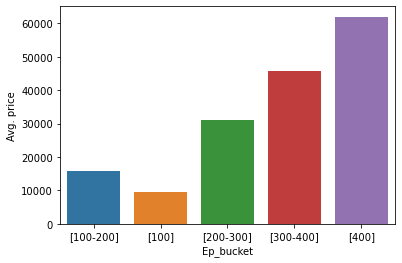

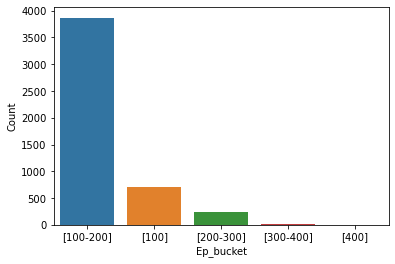

In [53]:
sns.barplot(x=x.Ep_bucket,y=x.price).set_ylabel('Avg. price')
plt.show()
x=bmw.groupby('Ep_bucket')['price'].count().reset_index()
sns.barplot(x=x.Ep_bucket,y=x.price).set_ylabel('Count')
plt.show()

In [54]:
bmw.groupby('Ep_bucket')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Ep_bucket,,,,,,,,
[100-200],3866.0,15839.498189,8069.718822,100.0,11800.0,14800.0,18700.0,178500.0
[100],706.0,9613.314448,3515.468320,100.0,8300.0,10000.0,11400.0,21700.0
[200-300],248.0,31018.145161,12831.358404,4500.0,21850.0,29450.0,38975.0,73100.0
[300-400],8.0,45775.000000,14247.280442,28000.0,33925.0,49100.0,52700.0,69700.0
[400],2.0,62000.000000,28849.956672,41600.0,51800.0,62000.0,72200.0,82400.0


- Observation:
    - There are around 3800 cars in this which has Engine power between 100-200  and avg.price is 15870
    -  2 cars has 400 engine power and avg. price is 62000

### Target Analysis

<AxesSubplot:xlabel='price', ylabel='Density'>

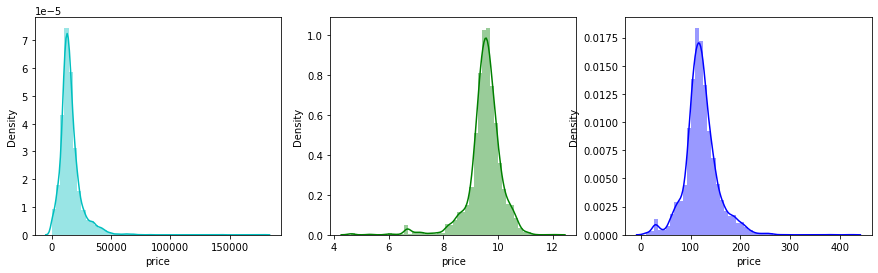

In [55]:
fig,ax=plt.subplots(1,3,figsize=(15,4))
sns.distplot(bmw.price,color='c',ax=ax[0])
sns.distplot(np.log1p(bmw.price),color='g',ax=ax[1])
sns.distplot(np.sqrt(bmw.price),color='b',ax=ax[2])

Target has some outliers, most of the cars price in between 0-50000

### Date related feature analysis

In [56]:
bmw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830 entries, 0 to 4842
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   maker_key              4830 non-null   object
 1   model_key              4830 non-null   object
 2   mileage                4830 non-null   int64 
 3   engine_power           4830 non-null   int64 
 4   registration_date      4830 non-null   object
 5   fuel                   4830 non-null   object
 6   paint_color            4830 non-null   object
 7   car_type               4830 non-null   object
 8   feature_1              4830 non-null   int64 
 9   feature_2              4830 non-null   int64 
 10  feature_3              4830 non-null   int64 
 11  feature_4              4830 non-null   int64 
 12  feature_5              4830 non-null   int64 
 13  feature_6              4830 non-null   int64 
 14  feature_7              4830 non-null   int64 
 15  feature_8            

- convert registration_date and sold_at  in to date time format
- add new feature age to calculate gap between registration and sold date to analyse further

In [57]:
bmw.registration_date=pd.to_datetime(bmw.registration_date)
bmw.sold_at=pd.to_datetime(bmw.sold_at)
bmw['age']=bmw.sold_at.dt.year-bmw.registration_date.dt.year
bmw['registration_year']=bmw.registration_date.dt.year
bmw['sold_year']=bmw.sold_at.dt.year

In [58]:
bmw.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,sold_at,fuel_E,paint_color_E,model_key_E,car_type_E,model_key_mileage_rel,Ep_bucket,age,registration_year,sold_year
0,BMW,118,140411,100,2012-01-02,diesel,black,convertible,1,1,...,2018-01-01,2,3,1,8,3,[100-200],6,2012,2018
1,BMW,M4,13929,317,2016-01-04,petrol,grey,convertible,1,1,...,2018-01-02,1,3,5,8,1,[300-400],2,2016,2018
2,BMW,320,183297,120,2012-01-04,diesel,white,convertible,0,0,...,2018-01-02,2,4,1,8,3,[100-200],6,2012,2018
3,BMW,420,128035,135,2014-01-07,diesel,red,convertible,1,1,...,2018-01-02,2,3,3,8,1,[100-200],4,2014,2018
4,BMW,425,97097,160,2014-01-12,diesel,silver,convertible,1,1,...,2018-01-04,2,2,3,8,1,[100-200],4,2014,2018


<AxesSubplot:xlabel='registration_year', ylabel='price'>

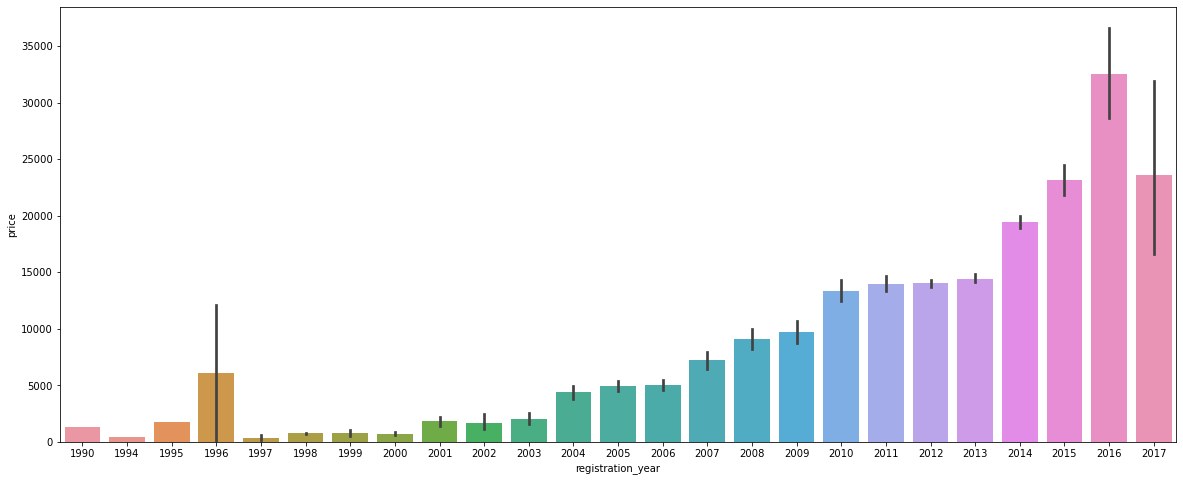

In [59]:
plt.figure(figsize=(20,8))
sns.barplot(x='registration_year',y='price',data=bmw)

- Observation:
   - As expected Newer cars are higher in price ,some price hike in 1996 

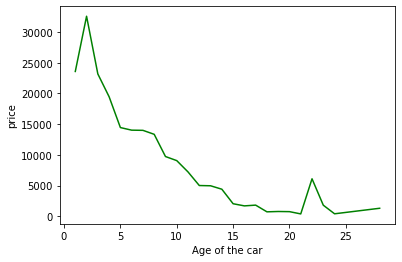

In [60]:
x = bmw.groupby('age')['price'].mean().reset_index()
sns.lineplot(x.age, x.price ,color = 'green').set_xlabel('Age of the car')
plt.show()

-Observation:
    Here Age of the car increases price will decreases ,but some price hike is there for 22-24 age cars

# Modelling

In [61]:
# import packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_log_error

In [62]:
bmw.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at', 'fuel_E', 'paint_color_E',
       'model_key_E', 'car_type_E', 'model_key_mileage_rel', 'Ep_bucket',
       'age', 'registration_year', 'sold_year'],
      dtype='object')

In [63]:
features = ['mileage', 'engine_power', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'fuel_E', 'paint_color_E',
       'model_key_E', 'car_type_E', 'model_key_mileage_rel','age']
target = 'price'

In [64]:
## splitting data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(bmw[features], bmw[target], test_size = 0.2, random_state = 42 )

In [65]:
### Model with default parameters; features scaling has not happened
RFModel = RandomForestRegressor().fit(X_train,y_train) # training

print('Train R^2 score {}'.format(r2_score(y_train, RFModel.predict(X_train))))
print('Test R^2 score {}'.format(r2_score(y_test, RFModel.predict(X_test))))

print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, RFModel.predict(X_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, RFModel.predict(X_test))))

Train R^2 score 0.9636345177213038
Test R^2 score 0.8856455303990828
Train mean_squared_log_error 0.048312811808278594
Test mean_squared_log_error 0.061943326700342624


In [66]:
## scaling features
scaler = StandardScaler().fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
## Get r-suqare score with each models
for model in [LinearRegression(), Ridge(), RandomForestRegressor(),SVR()]:
    scores = cross_val_score(model, X_train, y_train, cv= 5, scoring='r2',n_jobs=-1)
    print('Model =>',str(model))
    print('Avg. R^2_score: {}, std:{}, scores:{}'.format(np.mean(scores),np.std(scores), scores))

Model => LinearRegression()
Avg. R^2_score: 0.7148910161071655, std:0.12752881029130292, scores:[0.79996706 0.46121672 0.78282204 0.7603339  0.77011535]
Model => Ridge()
Avg. R^2_score: 0.7148944825441292, std:0.12752564981236314, scores:[0.79996619 0.46122496 0.78280207 0.76034925 0.77012995]
Model => RandomForestRegressor()
Avg. R^2_score: 0.7862638468377526, std:0.13595440760112537, scores:[0.8991026  0.52449427 0.86349222 0.85835917 0.78587098]
Model => SVR()
Avg. R^2_score: -0.013871089112928604, std:0.01634181881099169, scores:[-0.00637941 -0.01592354 -0.03250427  0.01322834 -0.02777658]


based on the CV scores and it’s observed that randomforest regression best fits the data compared to all the other methods.

#### Hyperparameter tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [99]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [103, 136, 169, 202,
                                                         235, 268, 301, 334,
                                                         367, 400]},
                   random_state=42, verbose=2)

In [100]:
rf_random.best_params_


{'n_estimators': 169,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [162]:
reg=RandomForestRegressor(n_estimators=169, min_samples_split= 2, min_samples_leaf= 2, max_features= 'sqrt',max_depth= 110, bootstrap= False)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=110, max_features='sqrt',
                      min_samples_leaf=2, n_estimators=169)

In [163]:
print('Train R^2 score {}'.format(r2_score(y_train, reg.predict(X_train))))
print('Test R^2 score {}'.format(r2_score(y_test, reg.predict(X_test))))

print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, reg.predict(X_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, reg.predict(X_test))))

Train R^2 score 0.9313270109031121
Test R^2 score 0.9000957598565829
Train mean_squared_log_error 0.07453783884972115
Test mean_squared_log_error 0.06909544233129765


# Summary:

- we have very less data for  hybrid petrol and electric fuel type cars.price of hybrid petrol cars are high,dropped for better predictions.
- Price of Orange color cars are high
- Here no feature has strong correlation with price i.e.(above 0.7).But Mileage and Price has some negatively correlation   (-0.41).Engine Power and Price has positive correlation (0.64).But due to outliers presence ,There is no strong evidence that     price will depend on mileage and engine power
- Trained and evaluated data using Random Forest model to predict used cars prediction, fine-tuned the model using cross-   validation and hyper parameter optimization techniques for better predictions.
-  Achieved R-square score 90% which indicates that model has strong features to predict resale value of used cars
